# __Mini-projet fonction logistique__

Les __systèmes chaotiques déterminés__ sont des systèmes dont les équations sont déterministes mais dont un changement minime dans les conditions initiales ou les paramètres\
provoque un grand changement dans les résultats.

On va ici étudier la suite récurrente $x_{i+1}=f(x_i)$ où $f(x_i)=r(1-x_i)x_i$ est la fonction logistique.\
Nous allons montrer que cette suite est chaotique et qu'un changement infime de la valeur de r provoque un grand changment dans la valeur de la suite.

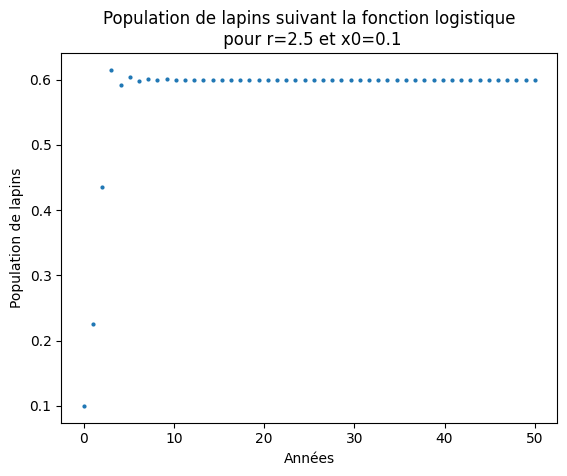

In [1]:
import numpy as np
from matplotlib import pyplot as plt

r=2.5
x0=0.1
x=np.linspace(0,50)
N=50
S=[x0] #S contient les valeurs des x_i, ainsi x_i=f(x_{i-1})=f(S[i-1])

for i  in range(1,N):
    S.append(r*(1-S[i-1])*S[i-1])

plt.plot(x,S,marker="o", markersize=2, linestyle=" ")
plt.xlabel("Années")
plt.ylabel("Population de lapins")
plt.title("Population de lapins suivant la fonction logistique\n pour r=2.5 et x0=0.1")
plt.show()


On voit ici qu'avec $r=2.5$ et $x_0=0.1$ la suite semble tendre vers 0.6.

### __Diagramme de Bifurcation__ 
C'est un diagramme où l'on va représenter les 100 derniers termes (sur 1000 calculés) de la suite en fonction de $r$, ici $r\in [2.5,4]$ et $x_0=0.000001$:

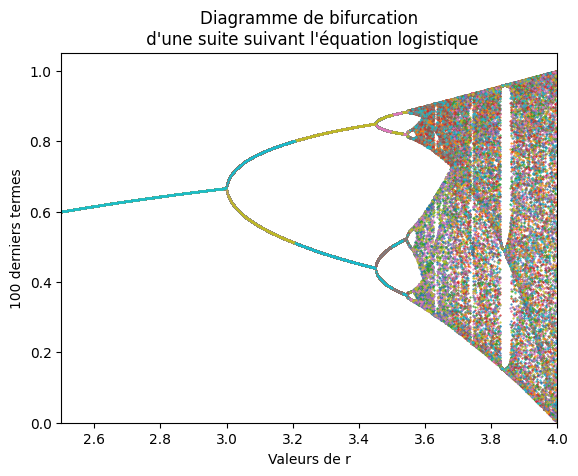

In [2]:
x0=0.000001
R=np.linspace(2.5,4,1000)
S_plot=[] #Va contenir les 100 dernières valeurs (sur les 1000) à plot

for r  in R:
    S=[x0] #S est réinitialisée à chaque tour de boucle
    for i in range(1,1000):
        S.append(r*(1-S[i-1])*S[i-1])
    S_plot.append(S[900:])

plt.plot(R,S_plot,marker="o", markersize=0.5, linestyle=" ")
plt.xlabel("Valeurs de r")
plt.ylabel("100 derniers termes")
plt.xlim(2.5,4)
plt.ylim(0,)
plt.title("Diagramme de bifurcation\n d'une suite suivant l'équation logistique")
plt.show()

Avec ce diagramme on voit bien la suite est stable jusqu'à la valeur $r=3.0$, à partir de laquelle la suite tends vers 2 valeurs différentes.\
Le nombre de valeurs vers laquelle la suite tends se multiplie de plus en plus jusqu'à ne pas pouvoir en distinguer le nombre.
Cela monte que la suite dépend effectivement fortement de $r$ et que d'infimes changements dans ses valeurs impactent grandement la suite.
Le diagramme ne dépend cependant pas de $x_0$, si l'on en change la valeur le digramme reste le même.

On va maintenant étudier l'exposant de Lyapunov:

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

Cet exposant permet de quantifier la stabilité ou l'instabilité de la suite, lorsqu'il est positif la suite est stable, lorsqu'il est négatif elle est instable.\
$\lambda$ peut aussi tendre vers plus ou moins l'infini, cela signifie alors que les valeurs de la suite vont s'éloignées fortement et rapidement.

$$f(x_i)=r(1-x_i)x_i \; \Rightarrow f^{\prime} (x_i)=r(1-2x_i)$$

On ne peut cependant pas calculer de sommes jusqu'à l'infini, on va donc chercher la valeur de $n$ minimum à utiliser.\
On prends trois valeurs de $r$, $2.5,\ 3.0,\ 4.0$, elle correspondent aux bornes auquelles on prends $r$ et à la valeur\
à partir de laquelle la suite commencent à ne plus avoir une valeur unique dans ses 100 derniers termes.\
La valeur de $n$ trouvée sera ensuite prise pour toutes les valeurs de $r$.

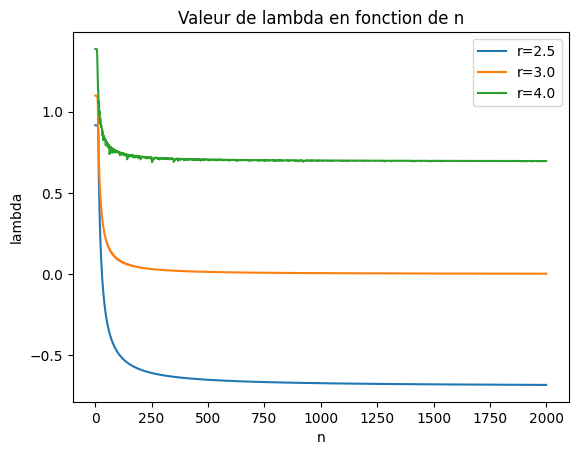

In [6]:
x0=0.000001
R=[2.5,3.0,4.0]

N=np.arange(1,2000,1)

for r in R:
    Sum=np.array([])
    Lambda=np.array([]) #Sum et Lambda sont réinitialisées pour les différentes valeurs de r

    for n  in N:
        x_i=np.array([x0]) #x_i est réinitialisée pour chaque n
        for j in range(1,n):
            x_i=np.append(x_i,np.array([r*(1-x_i[j-1])*x_i[j-1]])) #on ajoute au tableau de des x_i la nouvelle valeur calculée
        f_prime=r*(1-2*x_i)
        Sum=np.append(Sum, np.array([np.log(abs(f_prime)).sum()])) #La somme des ln(|f'(x_i)|) est ajouté au tableau des sommes pour les différents n
        Lambda=np.concatenate((Lambda,np.array([(1/n)*Sum[-1]]))) #Lambda est un tableau contenant les valeurs de somme pour les différents n
    

    plt.plot(N,Lambda[:],label=f"r={r}")

plt.xlabel("n")
plt.ylabel("lambda")
plt.title("Valeur de lambda en fonction de n")
plt.legend()
plt.show()

On voit ici que, plus r augmente, plus $\lambda$ converge vite.\
On prends donc $n=1500$, valeur à la quelle la courbe de $\lambda$ pour $r=2.5$ semble être une droite.

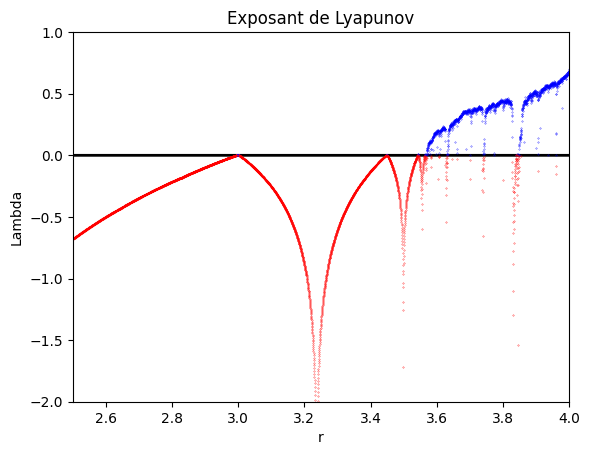

In [7]:
x0=0.000001
R=np.linspace(2.5,4,5000)

n=1500

Sum=np.array([])

for r  in R:
    x_i=np.array([x0])
    for j in range(1,n):
        x_i=np.append(x_i,np.array([r*(1-x_i[j-1])*x_i[j-1]]))
    f_prime=r*(1-2*x_i)
    Sum=np.append(Sum, np.array([np.log(abs(f_prime)).sum()]))

Lambda=(1/n)*Sum #Le principe de la boucle au-dessus est le même que dans la dernière cellule,
                 #la seule différence est que Lambda est un tableau contenant les différents
                 #lambda pour les différents r, avec un seul n.

Lambda_pos=np.array([])
R_pos=np.array([])
Lambda_neg=np.array([])
R_neg=np.array([])

for i in range(len(Lambda)): #On créé deux tableaux contenant les valeurs positives et négatives de lambda
                             #et les tableaux contenant les valeurs de r correspondantes
    if Lambda[i]>=0:
        Lambda_pos=np.append(Lambda_pos,np.array([Lambda[i]]))
        R_pos=np.append(R_pos,np.array([R[i]]))
    else:
        Lambda_neg=np.append(Lambda_neg,np.array([Lambda[i]]))
        R_neg=np.append(R_neg,np.array([R[i]]))

plt.plot(R,[0 for i in range(len(R))],linestyle="-", linewidth=2, color="k") #une ligne à lambda=0 pour créer une frontière entre les valeurs positives et négatives
plt.plot(R_pos,Lambda_pos, marker="o", markersize=0.25, linestyle=" ", color="b")
plt.plot(R_neg,Lambda_neg, marker="o", markersize=0.25, linestyle=" ", color="r") #on donne des couleurs différentes aux valeurs négatives et positives

plt.xlabel("r")
plt.ylabel("Lambda")
plt.xlim(2.5,4)
plt.ylim(-2.0,1.0)
plt.title("Exposant de Lyapunov")
plt.show()

# __Conclusion__

$\quad$ On voit bien que jusqu'à $r=3.0$ la suite est parfaitement stable, en accord avec le diagramme de bifurcation.\
A partir de $3.0$ les valeurs négatives semblent faire des pics successifs vers moins l'infini.\
Ces pics correspondent aux endroits (pour les mêmes valeurs de $r$) où les valeurs de la suite crées des embranchements sur le digramme de bifurcation.\
Plus $\lambda$ tends rapidement vers moins l'infini et, plus la largeur des pics est grande, plus l'embranchement sur le diagramme de bifurcation sera grand large.\
On voit aussi qu'à partir de $r\approx 3.55$, $\lambda$ devient majoritairement positif et on observe bien aux mêmes valeurs de $r$ sur le diagramme de bifurcation que la suite devient instable aux mêmes endrioits.

$\quad$ En conclusion, nous avons bien montré -via son diagramme de bifurcation et son exposant de Lyupanov- qu'une suite suivant l'équation logistique dépend fortment des valeurs de $r$ et est donc chaotique.